# Basic time series analysis
Note: I'm no expert; here are resources I'm using:
- [Analyticsvidhya tutorial](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- [Connor Johnson tutorial](http://connor-johnson.com/2014/11/23/time-series-forecasting-in-python-and-r/)
- [Machine Learning Mastery tutorial](http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

Steps to doing basic time series analysis:
- Make dataset stationary:
  - remove trend (general slope)
  - remove seasonality (long-period cycles)
  - 

- Check stationarity
  - Plot rolling statistics (moving average, moving variance) and look for constant value
  - Dickey-fuller test: test whether it is significantly different from a non-stationary time series


In [102]:
import pandas as pd
import numpy  as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
% matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys, os, copy
print("Using environment in "+sys.prefix)
print("Python version "+sys.version)

Using environment in /usr/local/Cellar/python/2.7.12/Frameworks/Python.framework/Versions/2.7
Python version 2.7.12 (default, Aug 23 2016, 08:54:23) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]


In [8]:
fname = 'Metro_Zhvi_AllHomes.csv'

#  Map Zillow RegionID to metro area string
metroRegionID = {'Dallas-Fort Worth, TX':394514,
                     'Atlanta, GA':394347,
                     'Phoenix, AZ':394976,
                     'Las Vegas, NV':394775 }

metroString = {'Dallas':u'Dallas-Fort Worth, TX',
               'Atlanta':u'Atlanta, GA',
               'Phoenix':u'Phoenix, AZ',
               'Vegas':u'Las Vegas, NV'}

city = 'Atlanta'
startDate = None #'2003-01'
endDate = None

df = pd.read_csv('Data/ZHVI/'+fname,index_col=[1])
df = df.drop(['RegionID','SizeRank'],axis=1)
df.columns = pd.DatetimeIndex(df.columns)
ts = df.loc[metroString[city], startDate:endDate ]

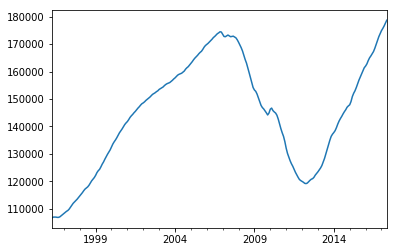

In [72]:
ts.plot()

In [ ]:
# By visual inspection, it appears to have been 193 months between 
#  the dip at the beginning of the data and the bottom of the recession.
# This is consistent with academic studies which have identified housing cycles every ~16-18 years.


In [80]:
rollMean = pd.rolling_mean(ts,window=193)

In [88]:
df = rollMean.reset_index()

ValueError: x and y must be the same size

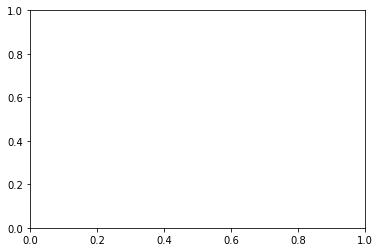

In [111]:
plt.scatter(X,Y)

[ 2.14285714  0.25      ]


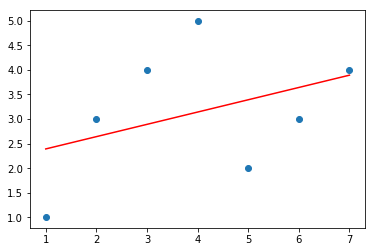

In [114]:
Y = np.array([1,3,4,5,2,3,4])
X = np.arange(1,8)
plt.scatter(X,Y)
Xm = sm.add_constant(X)
model = sm.OLS(Y,Xm)
results = model.fit()
print(results.params)
plt.plot(X,results.params[0]+X*results.params[1],'r')

In [106]:
y = rollMean.dropna().values
x = range(1,len(y)+1)

In [107]:
sm.OLS(y,x)

In [82]:
df.head()

,index,"Atlanta, GA"
0,1996-04-01,NaN
1,1996-05-01,NaN
2,1996-06-01,NaN
3,1996-07-01,NaN
4,1996-08-01,NaN


In [93]:
model = pd.ols(y = df['Atlanta, GA'],x=df.index.values.flatten(), intercept=True)

Exception: Invalid RHS type: <type 'numpy.ndarray'>

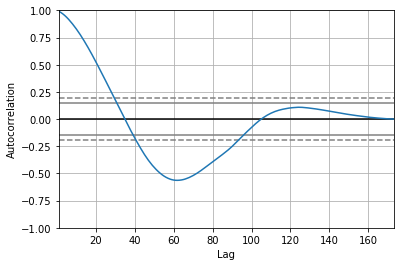

In [12]:
pd.tools.plotting.autocorrelation_plot(ts)

In [16]:
ts = df.loc[metroString[city],:]

In [69]:
ts.shape

(254,)

In [70]:
rollMean = pd.DataFrame()

for i in range(200,250):
    rollMean[i] = pd.rolling_mean(ts,window=i)

In [71]:
rollMean.diff(periods=1).std().idxmin()

249

In [49]:
myMeans = pd.DataFrame()

for i in np.arange(600,650):
    myMeans[i] = pd.rolling_mean(y, window=i)
    
diff = myMeans.diff(periods=1)


In [68]:
# These are the rolling means. They are periodic and filtered in the same period as the underlying data.
# We want to identify what window gives us the straightest rolling mean.
#  To do so, we will take the difference in the rolling mean (i.e. take the derivative)
#  Whichever has the smallest variance in the resulting derivative is the straightest
myMeans.diff(periods=1).std().idxmin()

628

In [67]:
myMeans.diff(periods=1).std().idxmin()

628

In [54]:
diff = myMeans.diff(periods=1)
diff.idxmin()

600    614
601    615
602    615
603    616
604    616
605    617
606    617
607    618
608    618
609    619
610    619
611    620
612    620
613    621
614    621
615    622
616    622
617    623
618    623
619    624
620    624
621    625
622    625
623    626
624    626
625    627
626    627
627    628
628    628
629    942
630    942
631    942
632    942
633    942
634    942
635    942
636    942
637    942
638    942
639    942
640    942
641    942
642    942
643    942
644    942
645    942
646    942
647    942
648    942
649    942
dtype: int64

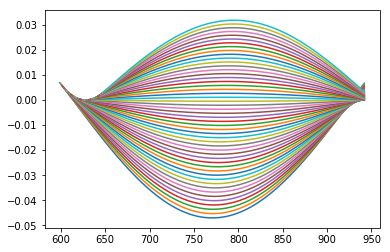

In [52]:
plt.plot(myMeans)

In [47]:
np.pi*2

6.283185307179586

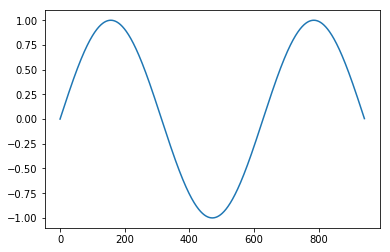

In [45]:
plt.plot(y)

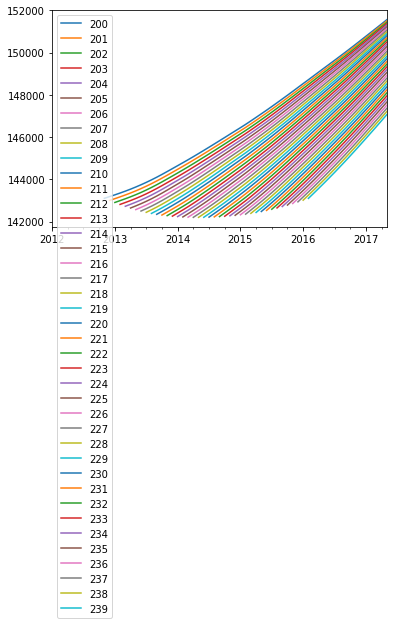

In [38]:
rollMean.loc['2012':,:].plot()

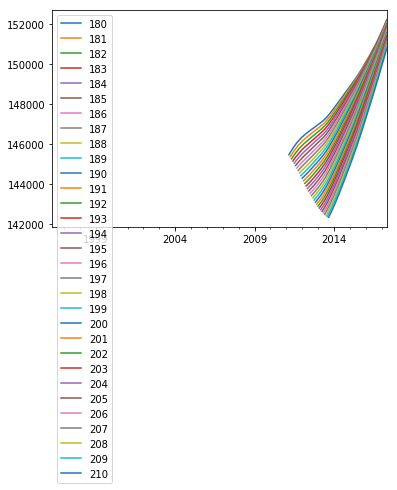

In [32]:
rollMean.loc[:,180:].plot()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=204,center=False).mean()
  from ipykernel import kernelapp as app


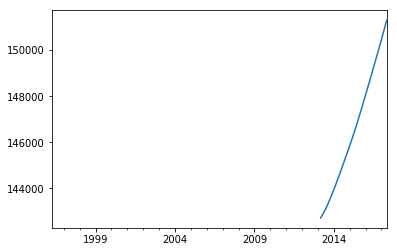

In [20]:
ts = df.loc[metroString[city],:]
pd.rolling_mean(ts,window=204).plot()